In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import talib
import numpy as np
import lightgbm as lgb

In [2]:
#Step1 Get Original Data from Interactivebroker
filename = "SPY_20040123_20200529_30min.csv" #from IB
df = pd.read_csv(filename,index_col = 0)
# df.reset_index(drop=True,inplace=True)
print(df.shape)
print(df.head(1))
print(df.tail(1))

(54688, 7)
                        open     high      low    close  volume  average  \
date                                                                       
2004-01-23 08:30:00  115.015  115.155  114.895  115.005      -1     -1.0   

                     barCount  
date                           
2004-01-23 08:30:00        -1  
                       open    high      low    close  volume  average  \
date                                                                     
2020-05-29 14:30:00  303.63  304.96  303.315  304.025      -1     -1.0   

                     barCount  
date                           
2020-05-29 14:30:00        -1  


In [3]:
#Step2 check data

#Check NAN
print(df.isnull().values.any() )
print("before dropping NaN", df.shape)
df.dropna(inplace=True)
print("after dropping NaN", df.shape)

# print( df.info() )
print(type(df.index[0]), df.index[0])
df.index = pd.to_datetime(df.index)
# print( df.info() )
print(type(df.index[0]), df.index[0])

False
before dropping NaN (54688, 7)
after dropping NaN (54688, 7)
<class 'str'> 2004-01-23 08:30:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2004-01-23 08:30:00


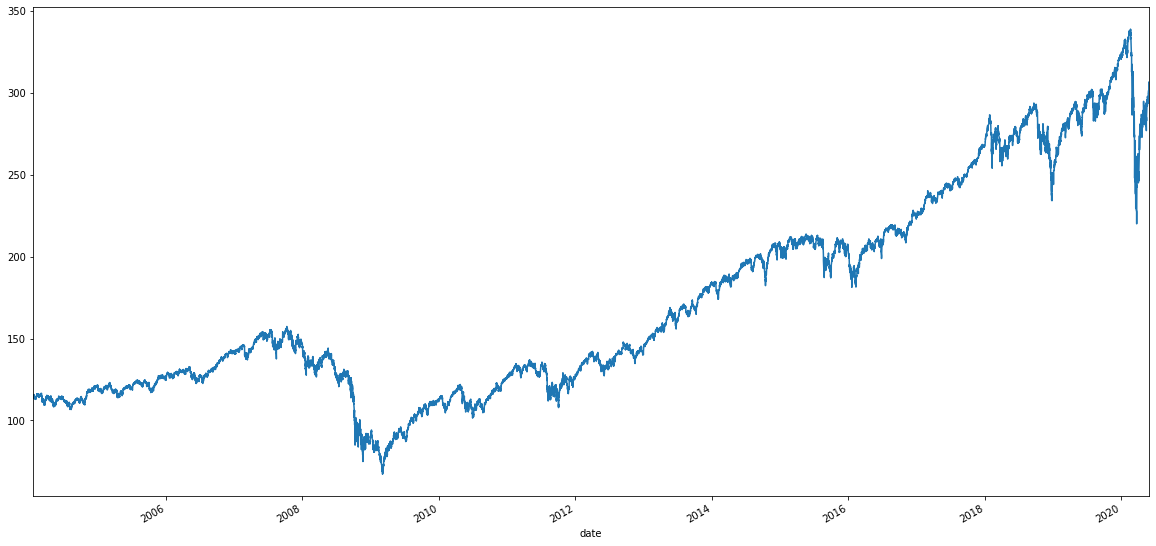

In [4]:
#Step Clean Data
tc=df.close #targetclose
plt.rcParams["figure.figsize"] = (20,10)
tc.plot()

In [5]:
import talib
import numpy as np
import pandas as pd

sma = talib.SMA(tc, timeperiod=120)
wma = talib.WMA(tc, timeperiod=120)
mom = talib.MOM(tc, timeperiod=120)
k, d = talib.STOCH  (tc, tc, tc, fastk_period=120, slowk_period=60, slowd_period=60)
k2, d2 = talib.STOCH(tc, tc, tc, fastk_period=240, slowk_period=120, slowd_period=120)
k3, d3 = talib.STOCH(tc, tc, tc, fastk_period=360, slowk_period=180, slowd_period=180)
k4, d4 = talib.STOCH(tc, tc, tc, fastk_period=480, slowk_period=240, slowd_period=240)
k5, d5 = talib.STOCH(tc, tc, tc, fastk_period=640, slowk_period=320, slowd_period=320)
k6, d6 = talib.STOCH(tc, tc, tc, fastk_period=720, slowk_period=360, slowd_period=360)
k7, d7 = talib.STOCH(tc, tc, tc, fastk_period=840, slowk_period=420, slowd_period=420)
k8, d8 = talib.STOCH(tc, tc, tc, fastk_period=960, slowk_period=480, slowd_period=480)

rsi = talib.RSI (tc, timeperiod=120)
rsi2 = talib.RSI(tc, timeperiod=240)
rsi3 = talib.RSI(tc, timeperiod=480)
rsi4 = talib.RSI(tc, timeperiod=640)
rsi5 = talib.RSI(tc, timeperiod=720)
rsi6 = talib.RSI(tc, timeperiod=840)

macd1, macd2, macd3 = talib.MACD(tc, fastperiod=120, slowperiod=60, signalperiod=60)
willr = talib.WILLR(tc, tc, tc, timeperiod=120)
cci = talib.CCI(tc, tc, tc, timeperiod=120)

dataset = pd.DataFrame({
    'RSIb': rsi / 50,
    'RSIb2': rsi2 / 50,
    'RSIb3': rsi3 / 50,
    'RSIb4': rsi4 / 50,
    'RSIb5': rsi5 / 50,
    'RSIb6': rsi6 / 50,
    'MOMb': mom - 0,
    'KDb': k - d,
    'KDb2': k2 - d2,
    'KDb3': k3 - d3,
    'KDb4': k4 - d4,
    'KDb5': k5 - d5,
    'KDb6': k6 - d6,
    'KDb7': k7 - d7,
    'KDb8': k8 - d8,
    
    'a5':   (tc.rolling(5).mean()   / tc),
    'a10':  (tc.rolling(10).mean()  / tc),
    'a20':  (tc.rolling(20).mean()  / tc),
    'a40':  (tc.rolling(40).mean()  / tc),
    'a80':  (tc.rolling(80).mean()  / tc),
    'a160': (tc.rolling(160).mean() / tc),
    'a320': (tc.rolling(320).mean() / tc),
    'a640': (tc.rolling(640).mean() / tc),
    'a720': (tc.rolling(720).mean() / tc),
    'a840': (tc.rolling(840).mean() / tc),
    'a960': (tc.rolling(960).mean() / tc),
    'a1024':(tc.rolling(1024).mean() / tc),
    'b1': tc/tc.shift(50),
    'b2': tc/tc.shift(100),
    'b3': tc/tc.shift(150),
    'b4': tc/tc.shift(200),
    'b5': tc/tc.shift(250),
    'b6': tc/tc.shift(300),
    'b7': tc/tc.shift(350),
    'LINEARREG_SLOPE0': talib.LINEARREG_SLOPE(tc, 60),
    'LINEARREG_SLOPE1': talib.LINEARREG_SLOPE(tc, 120),

    'ADXR0': talib.ADXR(tc, tc, tc, 60),
    'ADXR1': talib.ADXR(tc, tc, tc, 120),
    'ADXR2': talib.ADXR(tc, tc, tc, 240),
    'ADXR3': talib.ADXR(tc, tc, tc, 360),
    'ADXR4': talib.ADXR(tc, tc, tc, 480),
    'ADXR5': talib.ADXR(tc, tc, tc, 640),

    'return': tc.shift(-10) / tc,
})

feature_names = list(dataset.columns[:-1])

In [6]:
print(feature_names)

['RSIb', 'RSIb2', 'RSIb3', 'RSIb4', 'RSIb5', 'RSIb6', 'MOMb', 'KDb', 'KDb2', 'KDb3', 'KDb4', 'KDb5', 'KDb6', 'KDb7', 'KDb8', 'a5', 'a10', 'a20', 'a40', 'a80', 'a160', 'a320', 'a640', 'a720', 'a840', 'a960', 'a1024', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'LINEARREG_SLOPE0', 'LINEARREG_SLOPE1', 'ADXR0', 'ADXR1', 'ADXR2', 'ADXR3', 'ADXR4', 'ADXR5']


In [7]:
print("before dropping NaN", dataset.shape)
dataset.dropna(inplace=True)
print("after dropping NaN", dataset.shape)


before dropping NaN (54688, 43)
after dropping NaN (52760, 43)


In [8]:
# NN Preprocess

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
dataset_scaled = ss.fit_transform(dataset[feature_names])
dataset_scaled = pd.DataFrame(dataset_scaled, index=dataset.index, columns=feature_names)
dataset_scaled['return'] = dataset['return']
dataset_scaled.describe()

,RSIb,RSIb2,RSIb3,RSIb4,RSIb5,RSIb6,MOMb,KDb,KDb2,KDb3,...,b7,LINEARREG_SLOPE0,LINEARREG_SLOPE1,ADXR0,ADXR1,ADXR2,ADXR3,ADXR4,ADXR5,return
count,5.276000e+04,5.276000e+04,5.276000e+04,5.276000e+04,5.276000e+04,5.276000e+04,5.276000e+04,5.276000e+04,5.276000e+04,5.276000e+04,...,5.276000e+04,5.276000e+04,5.276000e+04,5.276000e+04,5.276000e+04,5.276000e+04,5.276000e+04,5.276000e+04,5.276000e+04,52760.000000
mean,-7.483316e-16,7.595348e-16,-3.755807e-15,-2.088507e-16,2.791066e-15,1.199898e-15,2.586256e-16,-1.213557e-17,-1.007113e-17,-1.060883e-16,...,3.696058e-16,-1.799841e-16,-1.232945e-16,1.163544e-15,-1.236885e-15,-7.819728e-16,-4.996119e-16,-3.087876e-16,-3.237883e-15,1.000244
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,...,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,0.009677
min,-4.715172e+00,-4.634725e+00,-3.983400e+00,-4.038829e+00,-4.049339e+00,-4.051506e+00,-1.307119e+01,-2.641088e+00,-2.780007e+00,-2.596404e+00,...,-6.962995e+00,-9.400066e+00,-1.152482e+01,-2.085333e+00,-1.964935e+00,-1.631041e+00,-1.769228e+00,-1.766522e+00,-1.723062e+00,0.881552
25%,-7.020198e-01,-6.799657e-01,-6.567954e-01,-6.391228e-01,-6.340583e-01,-6.159167e-01,-3.471638e-01,-6.414935e-01,-5.993242e-01,-6.301620e-01,...,-4.127101e-01,-3.900763e-01,-3.581626e-01,-6.956560e-01,-7.118517e-01,-7.322266e-01,-7.330156e-01,-7.523970e-01,-7.673047e-01,0.996522
50%,1.184003e-01,1.159720e-01,9.547407e-02,8.948845e-02,8.909938e-02,9.365815e-02,9.669754e-02,-8.173596e-03,-4.475004e-02,-2.102365e-02,...,1.377779e-01,6.771216e-02,9.263879e-02,-1.650850e-01,-1.974446e-01,-1.771966e-01,-1.703091e-01,-1.971697e-01,-2.481758e-01,1.000509
75%,7.435390e-01,7.350766e-01,7.239122e-01,7.363409e-01,7.314778e-01,7.250555e-01,4.567779e-01,6.420881e-01,5.711129e-01,6.082210e-01,...,5.564510e-01,4.836206e-01,4.737460e-01,5.508016e-01,5.802880e-01,5.203089e-01,5.059027e-01,5.689035e-01,7.376919e-01,1.004364
max,3.738440e+00,3.823789e+00,4.091562e+00,4.184757e+00,4.201516e+00,4.203241e+00,7.051417e+00,2.754711e+00,2.721798e+00,2.590595e+00,...,6.095199e+00,9.276779e+00,6.788333e+00,5.193427e+00,5.615028e+00,4.607167e+00,4.708054e+00,4.399382e+00,3.950181e+00,1.131803


In [10]:
# NN Model

In [11]:
import keras.layers as layers
from keras.models import Sequential
import keras

model = Sequential()
model.add(layers.Dense(100, activation='relu', input_shape=(len(feature_names),)))
#model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer="adam", )

Using TensorFlow backend.
C:\Users\avlel\miniconda3\envs\finlab\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\avlel\miniconda3\envs\finlab\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\avlel\miniconda3\envs\finlab\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\avlel\miniconda3\envs\finlab\lib




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               4300      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 4,401
Trainable params: 4,401
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
#NN Training

In [61]:
%%time 
#without GPU, 100 epoch Wall time: 2min 28s
dataset_scaled_train = dataset_scaled[:'2015']
dataset_scaled_test = dataset_scaled['2016':]
history = model.fit(dataset_scaled_train[feature_names], dataset_scaled_train['return'] > 1,epochs=100, validation_split=0.2)


Train on 30725 samples, validate on 7682 samples
Epoch 1/100
30725/30725 [==============================] - 1s 34us/step - loss: 0.3871 - val_loss: 0.3782
Epoch 2/100
30725/30725 [==============================] - 1s 33us/step - loss: 0.3800 - val_loss: 0.3773
Epoch 3/100
30725/30725 [==============================] - 1s 31us/step - loss: 0.3850 - val_loss: 0.4014
Epoch 4/100
30725/30725 [==============================] - 1s 33us/step - loss: 0.3778 - val_loss: 0.4026
Epoch 5/100
30725/30725 [==============================] - 1s 34us/step - loss: 0.3795 - val_loss: 0.4117
Epoch 6/100
30725/30725 [==============================] - 1s 37us/step - loss: 0.3744 - val_loss: 0.4014
Epoch 7/100
30725/30725 [==============================] - 1s 27us/step - loss: 0.3803 - val_loss: 0.4664
Epoch 8/100
30725/30725 [==============================] - 1s 31us/step - loss: 0.3770 - val_loss: 0.4272
Epoch 9/100
30725/30725 [==============================] - 1s 25us/step - loss: 0.3749 - val_loss: 0.44

30725/30725 [==============================] - 1s 26us/step - loss: 0.3524 - val_loss: 0.6117
Epoch 78/100
30725/30725 [==============================] - 1s 31us/step - loss: 0.3557 - val_loss: 0.5684
Epoch 79/100
30725/30725 [==============================] - 1s 27us/step - loss: 0.3534 - val_loss: 0.5736
Epoch 80/100
30725/30725 [==============================] - 1s 32us/step - loss: 0.3543 - val_loss: 0.5753
Epoch 81/100
30725/30725 [==============================] - 1s 26us/step - loss: 0.3531 - val_loss: 0.5815
Epoch 82/100
30725/30725 [==============================] - 1s 30us/step - loss: 0.3565 - val_loss: 0.5845
Epoch 83/100
30725/30725 [==============================] - 1s 27us/step - loss: 0.3506 - val_loss: 0.6029
Epoch 84/100
30725/30725 [==============================] - 1s 32us/step - loss: 0.3540 - val_loss: 0.5914
Epoch 85/100
30725/30725 [==============================] - 1s 25us/step - loss: 0.3509 - val_loss: 0.5778
Epoch 86/100
30725/30725 [========================

In [13]:
# Verify

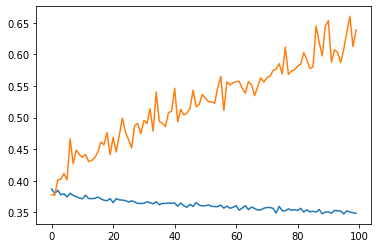

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

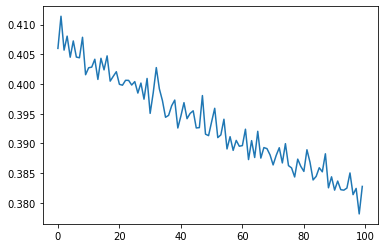

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])

In [15]:
# Back Testing

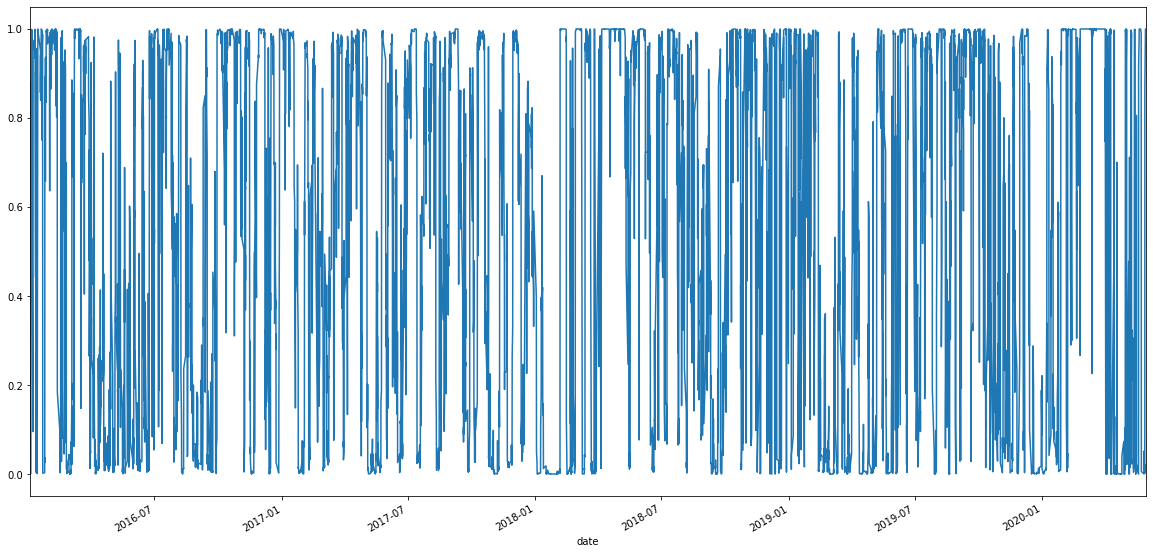

In [54]:
ey = model.predict(dataset_scaled_test[feature_names])
ey = pd.Series(ey.swapaxes(0, 1)[0], index=dataset_scaled_test.index)
plt.rcParams["figure.figsize"] = (20,10)
ey.plot()

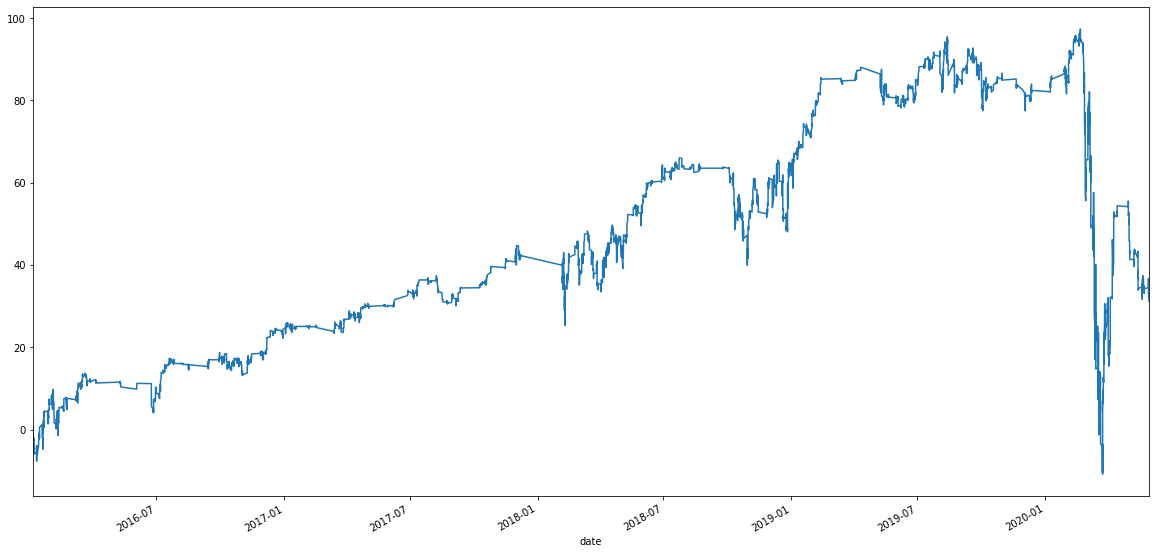

In [56]:
#qucik 
eq = tc[dataset_scaled_test.index]
gain = (eq.shift(-1) - eq)

signal = (ey > ey.quantile(0.7)).rolling(10).sum() > 0

eq = (gain[signal]['2016':]).cumsum()
eq.plot()

In [ ]:
#Cost
# (signal.astype(int).diff().abs().fillna(0) * 3)['2016':].sum()

In [57]:
print(eq.tail()) #1epoch 1662

date
2020-05-28 14:00:00    33.065
2020-05-28 14:30:00    32.315
2020-05-29 08:30:00    31.630
2020-05-29 09:00:00    31.105
2020-05-29 09:30:00       NaN
Name: close, dtype: float64


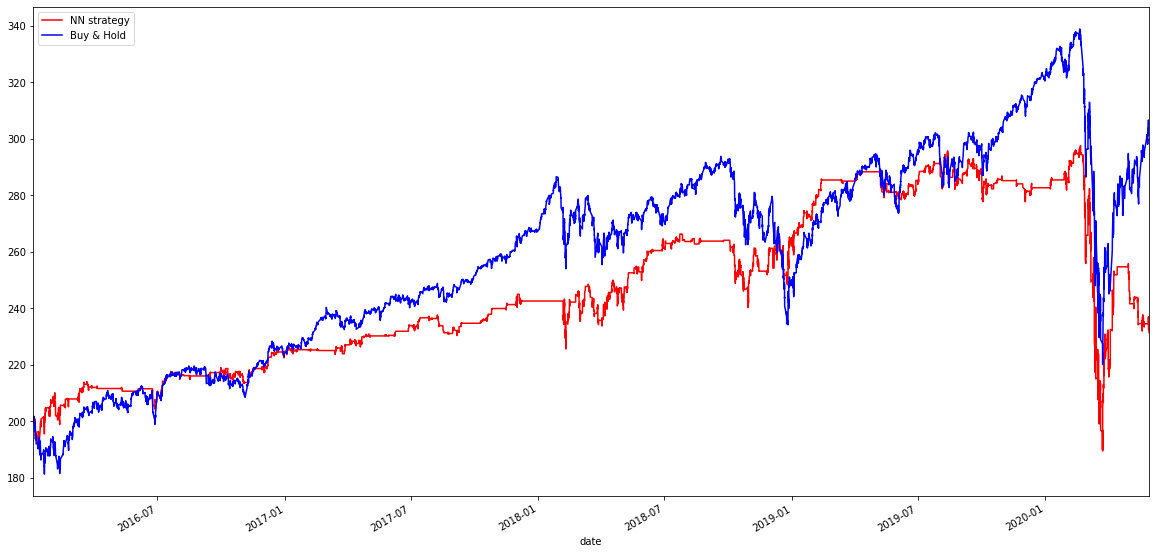

eqpc date
2016-01-04 09:00:00    0.0
2016-01-04 09:30:00    0.0
Name: close, dtype: float64


In [58]:
#Pyfolio
import pyfolio as pf
eq = tc[dataset_scaled_test.index]
gain = ((eq.shift(-1) - eq))
signal = (ey > ey.quantile(0.7)).rolling(10).sum() > 0
gain[signal==False]=0
creturn = gain.cumsum()
eq=creturn
# returns = tc.shift(-1)-tc

eq_relative = eq + tc[tc.index == eq.index[0]][0]
bm_relative = tc[eq.index[0]:]

eq_relative.plot(c="red",  label="NN strategy")
bm_relative.plot(c="blue", label="Buy & Hold" )
        
plt.legend(loc='best')
plt.show()

eqpc = eq_relative.pct_change()
print("eqpc", eqpc[1:].head(2))
        
bmpc = bm_relative[1:].pct_change()
        

Start date,2016-01-04
End date,2020-05-29
Total months,683
,Backtest
Annual return,0.3%
Cumulative returns,15.5%
Annual volatility,4.6%
Sharpe ratio,0.08
Calmar ratio,0.01
Stability,0.74
Max drawdown,-36.3%


C:\Users\avlel\miniconda3\envs\finlab\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,36.34,2020-02-20,2020-03-23,NaT,NaN
1,9.79,2018-07-26,2018-10-29,2019-01-04,116
2,7.91,2017-12-01,2018-02-09,2018-02-26,61
3,6.09,2019-08-13,2019-12-03,2020-02-13,133
4,5.96,2018-03-13,2018-04-02,2018-04-17,25


C:\Users\avlel\miniconda3\envs\finlab\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


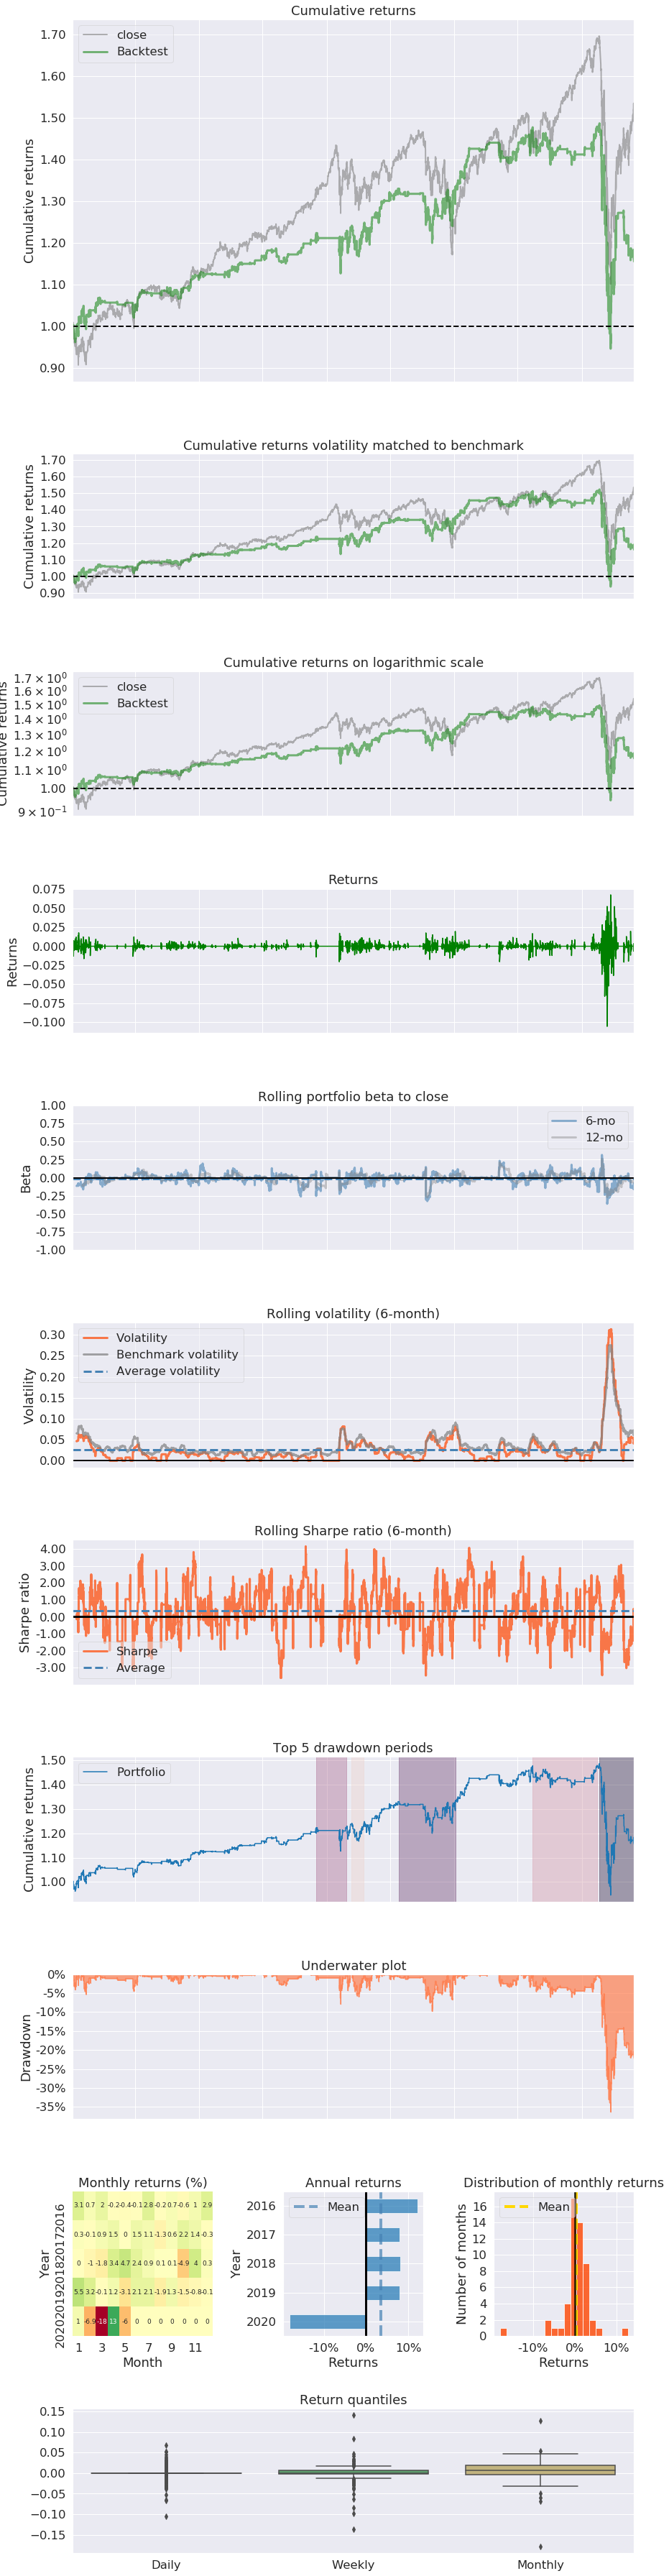

In [59]:
pf.create_returns_tear_sheet( eqpc[1:], benchmark_rets=bmpc[1:] )  #relative sharpe 0.5